## Ferrara Bus Network Optimization

### Group Member
- Ghisalberti L.
- Ghisleni M.
- Longhi A.

### Problem Description
The problem consists in optimizing the bus network of a city (which we assume is Ferrara).
The aim is to maximize the number of extra passengers collected in the network through an increasing number of auxiliary buses that make only the required journeys.

### Our early approach

We have tried to modify the excel file of departure as little as possible and for this reason __we have not changed the departure and end dates__.
However, for simplicity in writing the code, we have added an additional fictitious ride "s". This has no physical significance. We will need it later.

### Python Part 1 : incidence matrix

Using the pandas library, we created an incidence matrix starting from the data in the 'File_Di_Dati' file. The compatibility constraint is on line 23.

The incidence matrix shows whether a j-run can be performed after an i-run.
Following the same reasoning, we have created a "cost" matrix showing the extra passengers of j-run that can be done after an i-run.

The "s" ride can be done before any other ride and it will cost 0.

The incidence matrix and the cost matrix are saved in CSV format.


In [1]:
import numpy as np
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt

##############################################################################################################################
##############################################################################################################################

##### Reading of the two sheets from the Excel data file #####
porzioni = pd.read_excel(r'File_Di_Dati.xlsx', sheet_name = 'porzioni di viaggio')
percorrenza = pd.read_excel(r'File_Di_Dati.xlsx', sheet_name = 'tempi di percorrenza a vuoto', index_col = 0)

##### Creation of an incidence matrix based on the possibility of a bus to make two consecutive rides #####
incidenza = np.zeros((len(porzioni),len(porzioni)), dtype = np.int16)

for i in range(len(porzioni)):
    for j in range (i+1, len(porzioni)):
        
        final_stop = porzioni['final stop'][i]
        new_initial_stop = porzioni['initial stop'][j]
        minutes = pd.Timedelta(percorrenza[final_stop][new_initial_stop], unit = 'm')
        
        if porzioni['final time'][i] + minutes <= porzioni['initial time'][j]:
            incidenza[i][j] = -1
        else:
            incidenza[i][j] = 0

##### Creation of the cost matrix #####
costi = np.ones((len(incidenza),len(incidenza)), dtype = np.int16)

for i in range(len(incidenza)):
    for j in range(len(incidenza)):
        costi[i][j] = incidenza[i][j]*porzioni['extra passengers'][j]
    
lista_corse = []
for i in range(len(porzioni)):
    lista_corse.append(f'Corsa {i}')

##### Creating two CSV files #####
incidence = pd.DataFrame(incidenza, index = lista_corse, columns = lista_corse)
incidence.to_csv('Matrice_Incidenza.csv', index = True)

cost = pd.DataFrame(costi, index = lista_corse , columns = lista_corse )
cost.to_csv('Matrice_Costi.csv',index=True)

### Python Part 2 : Minimum Cost Flow Graph

We decided to solve the problem using the _minimum-cost-flow resolution algorithm_.

In particular, we have created an oriented graph: 
- The nodes represent all possible runs. 
- The arcs connect only the runs that can be performed in succession. To do this we used the incidence matrix.
- Two extra nodes have been added: s and t. These represent the start and end stop node. They are two fictitious nodes that have no physical meaning.
- All arches have a cost and this cost represents the number of extra passengers that the j-th ride carries.
- Node s and t have a demand of -1 and 1 respectively and cost 0.

In [2]:
G = nx.from_numpy_matrix(costi, create_using=nx.DiGraph)
plt.rcParams['figure.figsize']=[15,12]

T = nx.DiGraph()

G.add_node('s',demand=-1)
G.add_node('t',demand=1)
G.add_edge('s',0,weight=0)

T.add_node('s',demand=-1)
T.add_node('t',demand=1)

for i in range(157):
    G.add_edge(i,'t',weight=0)


# We do not recommend using this command.The graph takes a long time to display itself and it is
# of little help to better visualize the problem graphically.However it is possible to see how intricate the problem is 

## nx.draw(G)

### Insert number of bus

We ask you to enter the number of buses available to use to collect extra passengers.

In [3]:
k = 20

### Python Part 3 : For Cycle

Using the for-loop and the minimum-cost-flow algorithm we can solve the problem.

To do this, we use one bus at the time:
<br>1) The first bus will choose the best possible combination of stations that allow it to collect as many extra passengers as possible.
<br>2) Once the first step is done, all the nodes used in the first step will be no longer visited by following buses and therefore are eliminated. 
<br>3) Then, the second bus will choose the best combination of possible rides from the remaining ones.
<br>4) The for loop will continue to work in this way until it has used all available buses.

The budget of -1 and 1 of the s and t nodes allows the for-loop to solve the problem using one bus at a time.

For a better understanding of the problem, we have decided to __show which rides each bus will do and how many passengers it will collect__.

Il bus n° 1 effettua le corse n°:
1, 3, 11, 14, 18, 20, 23, 25, 31, 35, 37, 39, 40, 42, 45, 46, 48, 56, 79, 88, 89, 90, 92, 94, 95, 97, 99, 102, 115, 128, 136, 137, 139, 142, 144, 146, 149, 151, 154, 155, 156, 
Fin'ora sono stati usati: 1 bus
I passeggeri raccolti sono stati: 1672
Il percorso del 1° bus è il seguente:


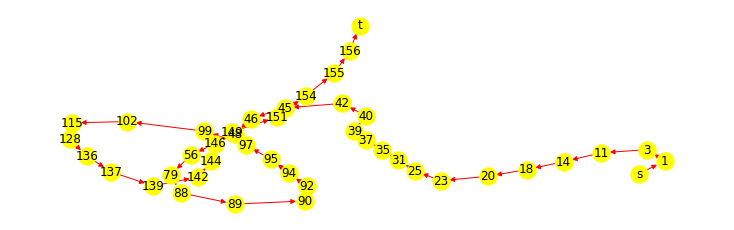

Il bus n° 2 effettua le corse n°:
2, 5, 10, 12, 17, 19, 21, 22, 26, 30, 33, 38, 41, 43, 50, 63, 87, 91, 93, 98, 100, 107, 118, 122, 135, 138, 140, 143, 148, 152, 153, 
Fin'ora sono stati usati: 2 bus
I passeggeri raccolti sono stati: 966
Il percorso del 2° bus è il seguente:


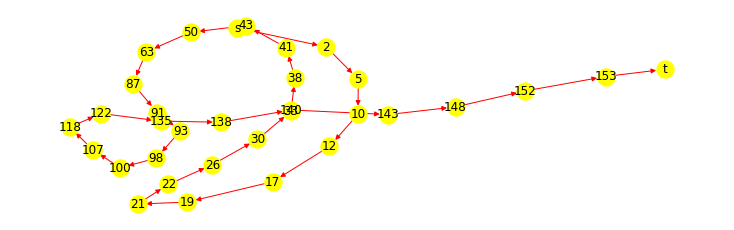

Il bus n° 3 effettua le corse n°:
8, 15, 16, 24, 27, 32, 36, 44, 47, 71, 86, 96, 101, 117, 121, 141, 145, 147, 
Fin'ora sono stati usati: 3 bus
I passeggeri raccolti sono stati: 560
Il percorso del 3° bus è il seguente:


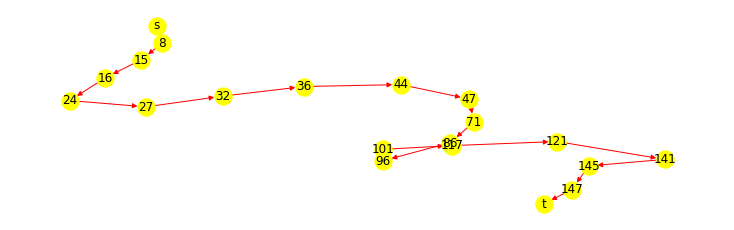

Il bus n° 4 effettua le corse n°:
6, 9, 13, 28, 34, 51, 84, 104, 116, 133, 150, 
Fin'ora sono stati usati: 4 bus
I passeggeri raccolti sono stati: 391
Il percorso del 4° bus è il seguente:


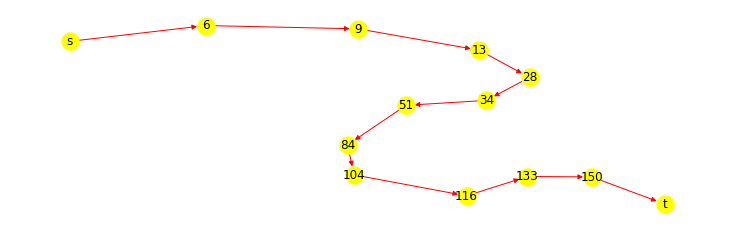

Il bus n° 5 effettua le corse n°:
4, 29, 49, 64, 111, 119, 131, 
Fin'ora sono stati usati: 5 bus
I passeggeri raccolti sono stati: 286
Il percorso del 5° bus è il seguente:


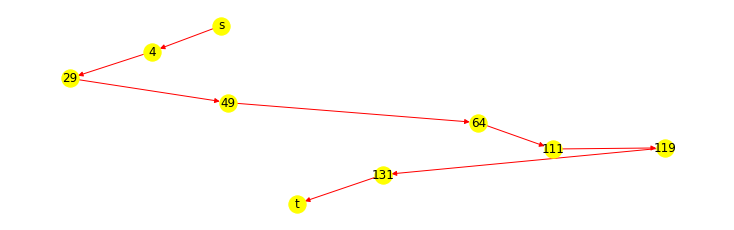

Il bus n° 6 effettua le corse n°:
7, 60, 110, 129, 
Fin'ora sono stati usati: 6 bus
I passeggeri raccolti sono stati: 178
Il percorso del 6° bus è il seguente:


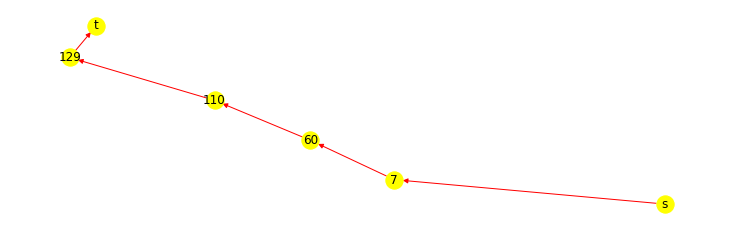

Il bus n° 7 effettua le corse n°:
53, 105, 126, 
Fin'ora sono stati usati: 7 bus
I passeggeri raccolti sono stati: 133
Il percorso del 7° bus è il seguente:


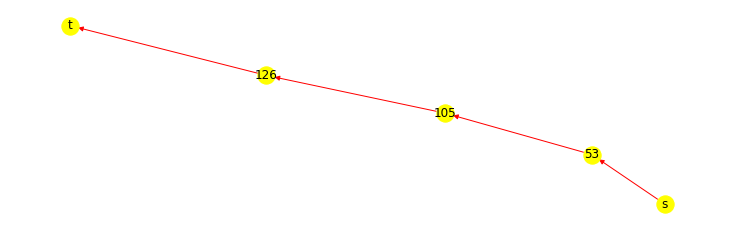

Il bus n° 8 effettua le corse n°:
61, 112, 127, 
Fin'ora sono stati usati: 8 bus
I passeggeri raccolti sono stati: 112
Il percorso del 8° bus è il seguente:


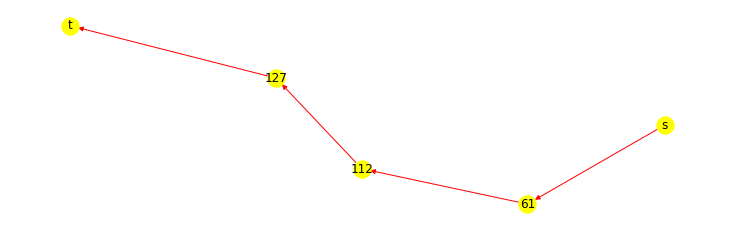

Il bus n° 9 effettua le corse n°:
65, 109, 120, 
Fin'ora sono stati usati: 9 bus
I passeggeri raccolti sono stati: 103
Il percorso del 9° bus è il seguente:


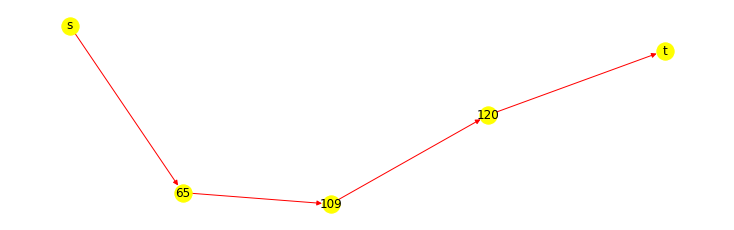

Il bus n° 10 effettua le corse n°:
62, 113, 134, 
Fin'ora sono stati usati: 10 bus
I passeggeri raccolti sono stati: 91
Il percorso del 10° bus è il seguente:


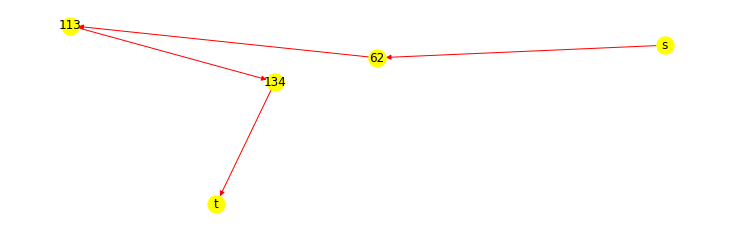

Il bus n° 11 effettua le corse n°:
57, 103, 125, 
Fin'ora sono stati usati: 11 bus
I passeggeri raccolti sono stati: 86
Il percorso del 11° bus è il seguente:


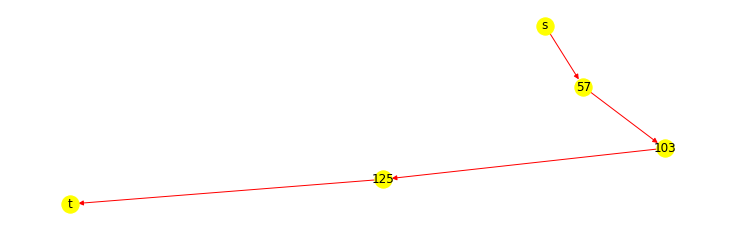

Il bus n° 12 effettua le corse n°:
75, 106, 132, 
Fin'ora sono stati usati: 12 bus
I passeggeri raccolti sono stati: 83
Il percorso del 12° bus è il seguente:


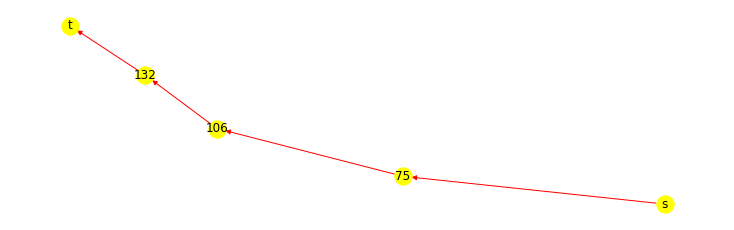

Il bus n° 13 effettua le corse n°:
59, 108, 130, 
Fin'ora sono stati usati: 13 bus
I passeggeri raccolti sono stati: 80
Il percorso del 13° bus è il seguente:


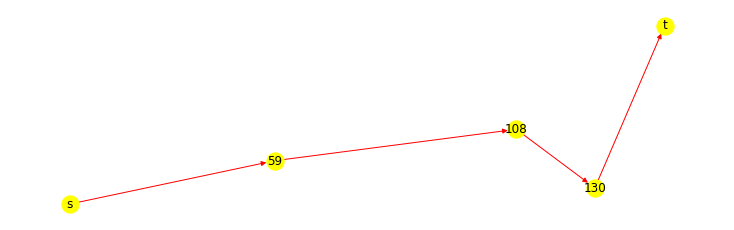

Il bus n° 14 effettua le corse n°:
73, 114, 123, 
Fin'ora sono stati usati: 14 bus
I passeggeri raccolti sono stati: 67
Il percorso del 14° bus è il seguente:


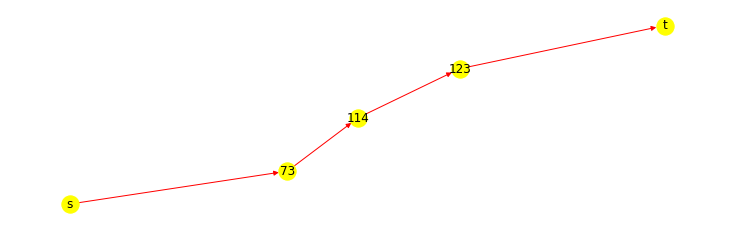

Il bus n° 15 effettua le corse n°:
66, 124, 
Fin'ora sono stati usati: 15 bus
I passeggeri raccolti sono stati: 49
Il percorso del 15° bus è il seguente:


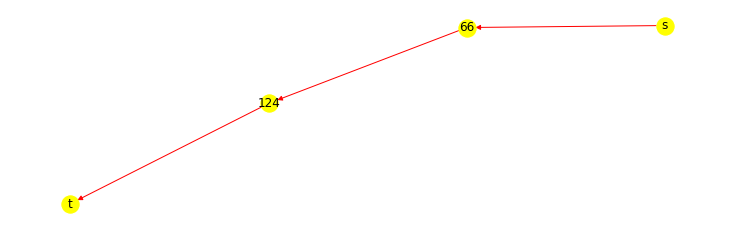

Il bus n° 16 effettua le corse n°:
72, 
Fin'ora sono stati usati: 16 bus
I passeggeri raccolti sono stati: 36
Il percorso del 16° bus è il seguente:


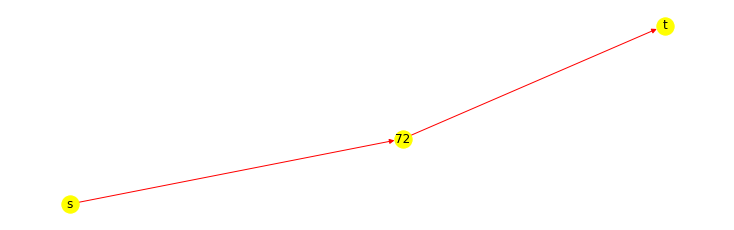

Il bus n° 17 effettua le corse n°:
74, 
Fin'ora sono stati usati: 17 bus
I passeggeri raccolti sono stati: 32
Il percorso del 17° bus è il seguente:


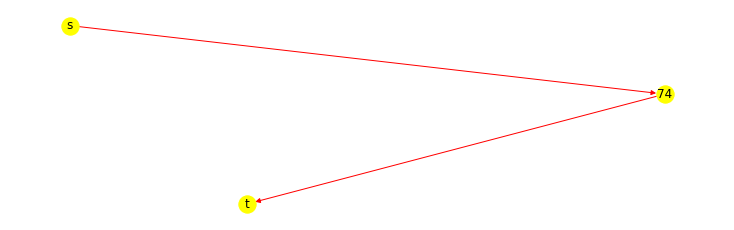

Il bus n° 18 effettua le corse n°:
52, 
Fin'ora sono stati usati: 18 bus
I passeggeri raccolti sono stati: 31
Il percorso del 18° bus è il seguente:


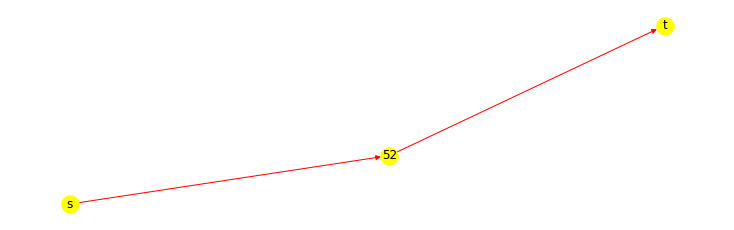

Il bus n° 19 effettua le corse n°:
58, 
Fin'ora sono stati usati: 19 bus
I passeggeri raccolti sono stati: 31
Il percorso del 19° bus è il seguente:


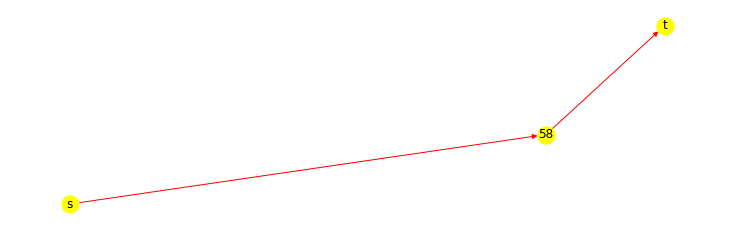

Il bus n° 20 effettua le corse n°:
80, 
Fin'ora sono stati usati: 20 bus
I passeggeri raccolti sono stati: 31
Il percorso del 20° bus è il seguente:


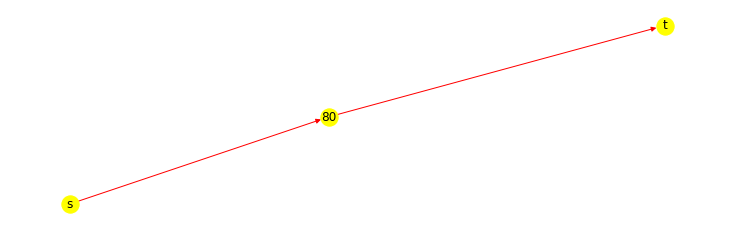

In [4]:
##### Assignment, creation and setting of some variables #####
c , r , j , passeggeri_bus = 0 , 0 , 0 , 0

resoconto = {"Corse eseguite:": [], "Passeggeri raccolti:": [], "Passeggeri raccolti fin'ora:": []}

plt.rcParams["figure.figsize"] = (10,3)


##### for loop for each bus #####
for h in range(k):    
    lista = []
    lista.clear()

    ##### minimum cost flow algorithm #####
    print(f'Il bus n° {h+1} effettua le corse n°:')    
    passeggeri = nx.min_cost_flow_cost(G)
    passeggeri_nuovo = nx.min_cost_flow(G)
    
    ##### Creation of the graph with the runs made by the i-th bus #####
    for i in passeggeri_nuovo:
        for j in passeggeri_nuovo[i]:
            if (passeggeri_nuovo[i][j] == 1 and j != 0 and j != 't'):
                G.remove_node(j)
                T.add_node(j)
                a = 1 + c
                if a == 1:
                    T.add_edge('s',j)
                    c = 1
                else:
                    T.add_edge(r,j)
                print(j,end =', ')
                lista.append(j)
                r = j
    
    
    ##### Values assignement #####
    passeggeri_bus += passeggeri
    resoconto["Corse eseguite:"].append(lista)
    resoconto["Passeggeri raccolti:"].append(passeggeri*(-1))
    resoconto["Passeggeri raccolti fin'ora:"].append(passeggeri_bus*(-1)) 
    
    ##### Values printing #####
    print(f"\nFin'ora sono stati usati: {h+1} bus")
    print(f"I passeggeri raccolti sono stati: {passeggeri*(-1)}")
    print(f"Il percorso del {h+1}° bus è il seguente:")
    
    ##### Drawing of the graph with the trips made by the i-th bus #####
    T.add_edge(r,'t')
    nx.draw(T,with_labels=True,edge_color='red',node_color="yellow")
    plt.show()
    T = nx.DiGraph()
    c = 0
    
    
dataf = pd.DataFrame.from_dict(resoconto, orient ='index', columns = list(range(1,k+1)))
dataf.to_csv('Resoconto_Finale.csv',index=True, index_label = "Bus numero:")